<a href="https://colab.research.google.com/github/Crepopcorn/sit_detection_project/blob/main/drowsiness_detection_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start

# **Drowsiness Detection Model**

In [1]:
import os
import pandas as pd
from keras.datasets import mnist
import keras
from keras import layers
from keras import models
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import label_binarize
from PIL import Image

In [2]:
from google.colab import drive

drive.mount("/content/drive/")

Mounted at /content/drive/


Import dataset

In [3]:
train_path="/content/drive/My Drive/PreparedData/Train/"
print('total training closeEye images:', len(os.listdir(train_path+"Closed")))
print('total training openEye images:', len(os.listdir(train_path+"Opened")))
test_path="/content/drive/My Drive/PreparedData/Test/"
print('total test closeEye images:', len(os.listdir(test_path+"Closed")))
print('total test openEye images:', len(os.listdir(test_path+"Opened")))

total training closeEye images: 2190
total training openEye images: 2042
total test closeEye images: 480
total test openEye images: 424


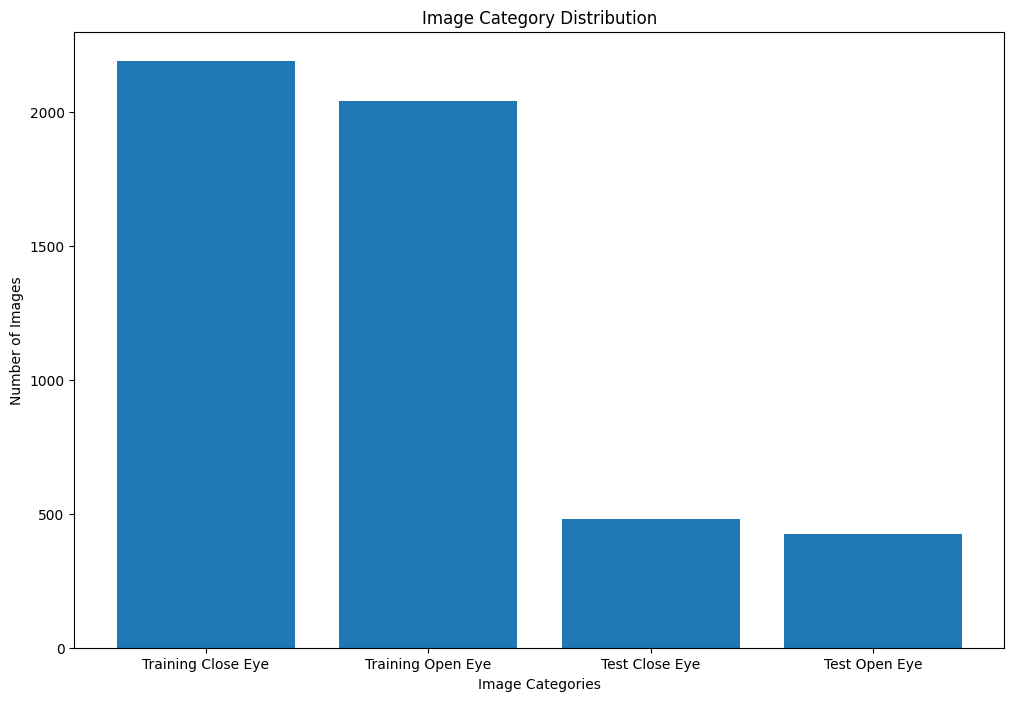

In [4]:
import matplotlib.pyplot as plt
import os

train_path="/content/drive/My Drive/PreparedData/Train/"
test_path="/content/drive/My Drive/PreparedData/Test/"
training_closeEye_images = len(os.listdir(train_path+"Closed"))
training_openEye_images = len(os.listdir(train_path+"Opened"))
test_closeEye_images = len(os.listdir(test_path+"Closed"))
test_openEye_images = len(os.listdir(test_path+"Opened"))

labels = ['Training Close Eye', 'Training Open Eye', 'Test Close Eye', 'Test Open Eye']
values = [training_closeEye_images, training_openEye_images, test_closeEye_images, test_openEye_images]

plt.figure(figsize=(12, 8))

plt.bar(labels, values)
plt.xlabel('Image Categories')
plt.ylabel('Number of Images')
plt.title('Image Category Distribution')
plt.show()

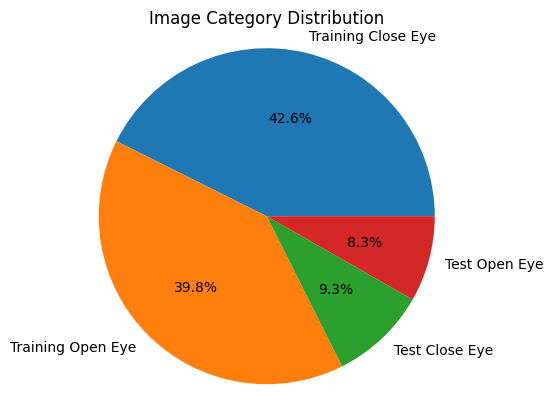

In [5]:
sizes = [training_closeEye_images, training_openEye_images, test_closeEye_images, test_openEye_images]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Image Category Distribution')

plt.axis('equal')
plt.show()

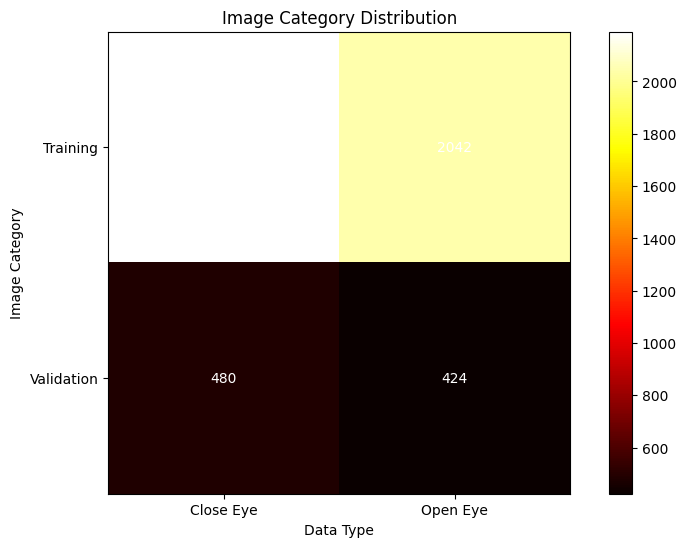

In [6]:
data = np.array([[training_closeEye_images, training_openEye_images],
                 [test_closeEye_images, test_openEye_images]])
labels = ['Close Eye', 'Open Eye']
categories = ['Training', 'Validation']

plt.figure(figsize=(10, 6))

heatmap = plt.imshow(data, cmap='hot')
for i in range(len(categories)):
    for j in range(len(labels)):
        plt.text(j, i, data[i, j], ha='center', va='center', color='white')

plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(categories)), categories)
plt.colorbar(heatmap)

plt.title('Image Category Distribution')
plt.xlabel('Data Type')
plt.ylabel('Image Category')
plt.show()

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1,activation = 'sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# **Part 2**

In [8]:
import timeit
import numpy as np

start = timeit.default_timer()

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_dir = '/content/drive/My Drive/PreparedData/Train'
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')

validation_dir = '/content/drive/My Drive/PreparedData/Val'
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary')
for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('data batch shape:',labels_batch.shape)
    break

steps_per_epoch_value = np.ceil((len(os.listdir(train_dir+"/Closed"))+len(os.listdir(train_dir+"/Opened")))/20)
validation_steps_value = np.ceil((len(os.listdir(validation_dir+"/Closed"))+len(os.listdir(validation_dir+"/Opened")))/20)

history = model.fit(
                    train_generator,
                    steps_per_epoch = steps_per_epoch_value,
                    epochs = 200,
                    validation_data = validation_generator,
                    validation_steps = validation_steps_value)

stop = timeit.default_timer()
print('Runtime (seconds): ', stop - start)

Found 4232 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
data batch shape: (20, 150, 150, 3)
data batch shape: (20,)
Epoch 1/200
212/212 [==============================] - 2154s 10s/step - loss: 0.3242 - acc: 0.8511 - val_loss: 0.0953 - val_acc: 0.9700
Epoch 2/200
212/212 [==============================] - 18s 85ms/step - loss: 0.1299 - acc: 0.9579 - val_loss: 0.0857 - val_acc: 0.9750
Epoch 3/200
212/212 [==============================] - 18s 86ms/step - loss: 0.1050 - acc: 0.9655 - val_loss: 0.0980 - val_acc: 0.9737
Epoch 4/200
212/212 [==============================] - 18s 85ms/step - loss: 0.0888 - acc: 0.9690 - val_loss: 0.0960 - val_acc: 0.9650
Epoch 5/200
212/212 [==============================] - 18s 84ms/step - loss: 0.0834 - acc: 0.9733 - val_loss: 0.0579 - val_acc: 0.9825
Epoch 6/200
212/212 [==============================] - 18s 84ms/step - loss: 0.0770 - acc: 0.9757 - val_loss: 0.0598 - val_acc: 0.9825
Epoch 7/200
212/212 [=========================

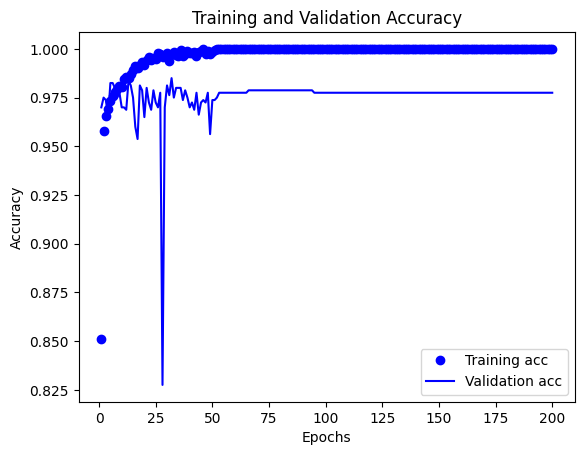

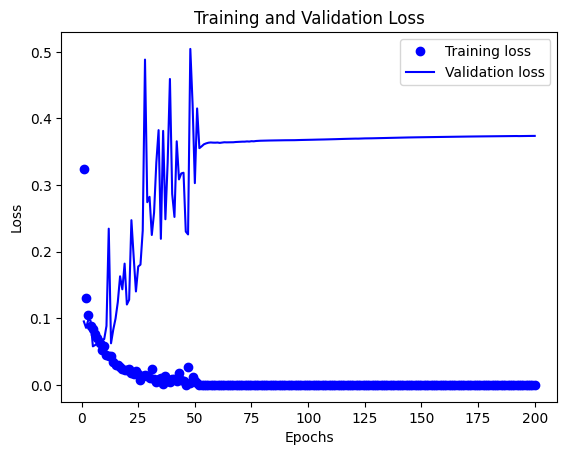

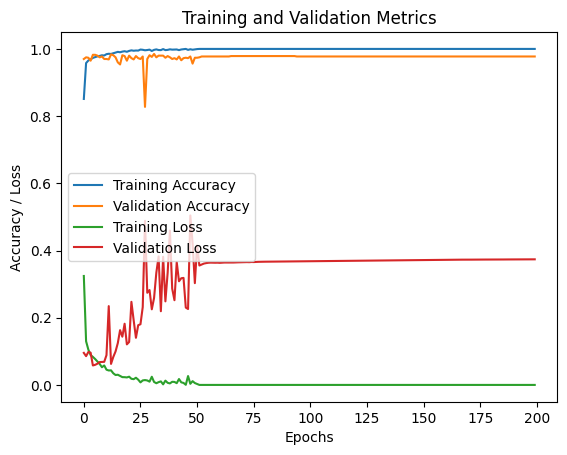

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.title('Training and Validation Metrics')
plt.legend()
plt.show()

In [10]:
model.save('drowsiness_detector_main.h5')
model = load_model('drowsiness_detector_main.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 302ms/step
Prediction: Closed
1/1 [==============================] - 0s 21ms/step


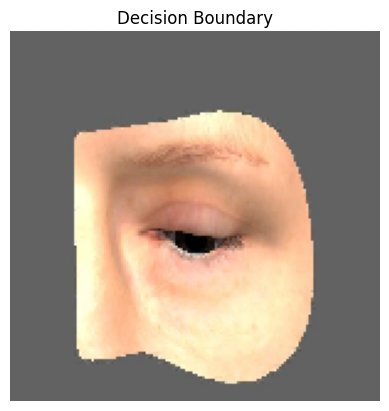

In [11]:
model = load_model('drowsiness_detector_main.h5')

img_path = "/content/drive/My Drive/PreparedData/tired_worker.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img) / 255.0
img_tensor = np.expand_dims(img_tensor, axis=0)

result = model.predict(img_tensor)
prediction = "Open" if result > 0.5 else "Closed"
print("Prediction:", prediction)

fig, ax = plt.subplots()
closed_eye_path = "/content/drive/My Drive/PreparedData/Test/Closed/"
closed_eye_images = os.listdir(closed_eye_path)

for image_name in closed_eye_images:
    image_path = os.path.join(closed_eye_path, image_name)
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    prediction = model.predict(np.expand_dims(img_array, axis=0))
    if prediction > 0.5:
        ax.imshow(img_array)
        break

open_eye_path = "/content/drive/My Drive/PreparedData/Test/Opened/"
open_eye_images = os.listdir(open_eye_path)
for image_name in open_eye_images:
    image_path = os.path.join(open_eye_path, image_name)
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    prediction = model.predict(np.expand_dims(img_array, axis=0))
    if prediction <= 0.5:
        ax.imshow(img_array)
        break

plt.title("Decision Boundary")
plt.axis("off")
plt.show()

1/1 [==============================] - 0s 86ms/step
[[0.5730692]]
(150, 150, 3)


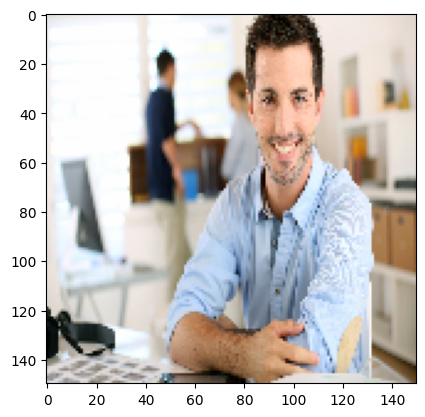

The probability of opened eye is： 0.5730692


In [12]:

model = load_model('drowsiness_detector_main.h5')

img_path = '/content/drive/My Drive/PreparedData/awake_worker.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.0

result = model.predict(img_tensor)
print(result)

img_scale = img_tensor[0]
print(img_scale.shape)

plt.imshow(img_scale)
plt.show()

if result[0][0] > 0.5:
    print('The probability of opened eye is：', result[0][0])
else:
    print('The probability of closed eye is：', 1 - result[0][0])

1/1 [==============================] - 0s 85ms/step
[[8.96231e-14]]
(150, 150, 3)


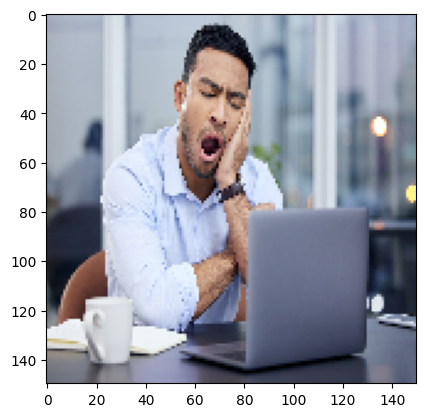

The probability of closed eye is： 0.9999999999999104


In [13]:
model = load_model('drowsiness_detector_main.h5')

img_path = '/content/drive/My Drive/PreparedData/tired_worker.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.0

result = model.predict(img_tensor)
print(result)

img_scale = img_tensor[0]
print(img_scale.shape)

plt.imshow(img_scale)
plt.show()

if result[0][0] > 0.5:
    print('The probability of opened eye is：', result[0][0])
else:
    print('The probability of closed eye is：', 1 - result[0][0])

In [16]:
import torch

path = "/content/drive/My Drive/PreparedData/eye_drowsiness.pt"
torch.save(model, path)

(1, 150, 150, 3)


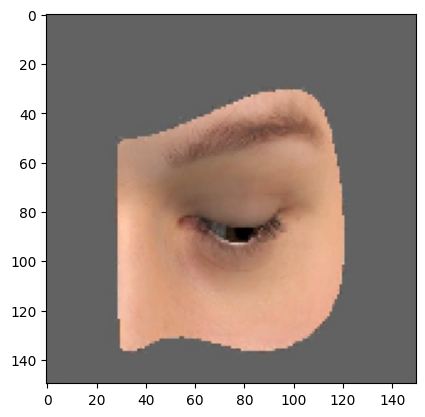

1/1 [==============================] - 1s 502ms/step


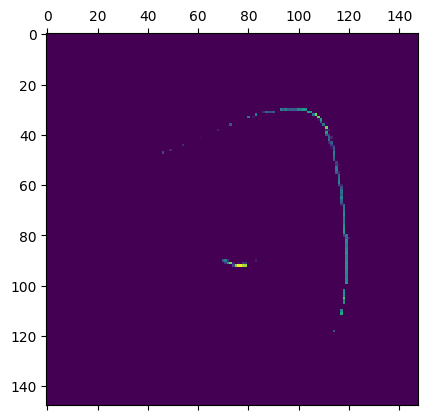

In [13]:
img_path = "/content/drive/My Drive/PreparedData/Train/Closed/307.jpg"
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show()

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:,:,1],  cmap="viridis")

32
32
64
64


<ipython-input-22-c0dc322794bb>:24: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype("uint8")


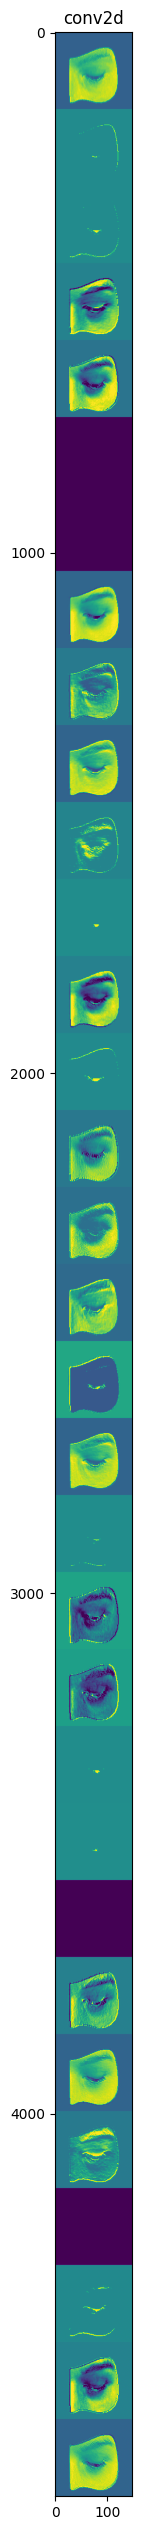

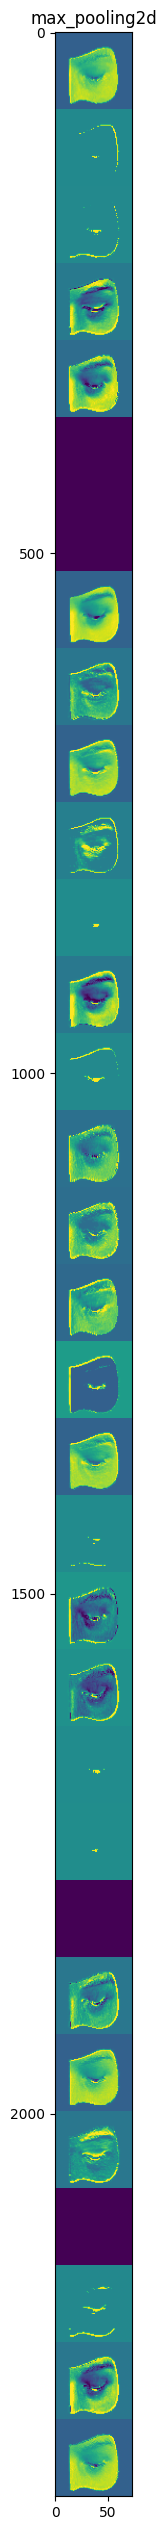

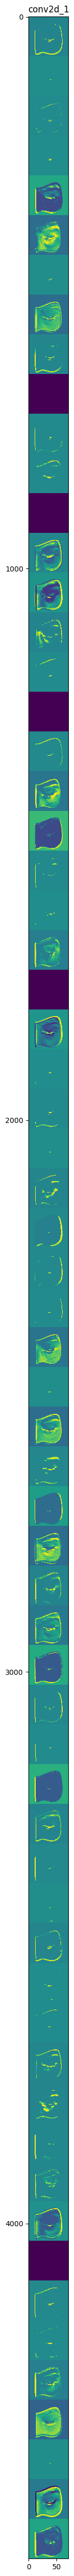

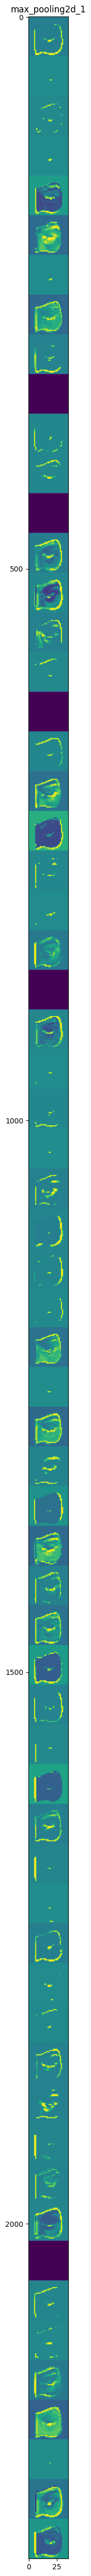

In [22]:
layer_names = []
for layer in model.layers[:4]:
    layer_names.append(layer.name)

images_pre_row = 1

for layer_name, layer_activation in zip(layer_names, activations):
    #print(layer_activation.shape)
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_col = n_features
    print(str(n_col))
    display_grid = np.zeros((size*n_col, images_pre_row*size))
    for col in range(n_col):
        for row in range(images_pre_row):
            #print(str(col*images_pre_row+row))
            channel_image = layer_activation[0,:,:,col*images_pre_row+row]

            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128

            channel_image = np.clip(channel_image, 0, 255).astype("uint8")
            display_grid[col*size:(col+1)*size, row*size:(row+1)*size] = channel_image
    scale = 1./size

    plt.figure(figsize=(scale*display_grid.shape[1],scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)

    plt.imshow(display_grid, aspect="auto", cmap="viridis")

40/40 [==============================] - 3s 67ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


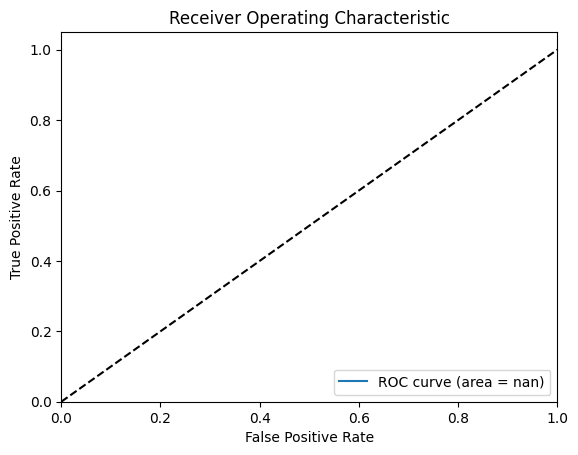

In [24]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import label_binarize

validation_generator.reset()
predicted_probs = model.predict(validation_generator)
num_classes = predicted_probs.shape[1]

true_labels = validation_generator.classes
true_labels_binary = label_binarize(true_labels, classes=range(num_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels_binary[:, i], predicted_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


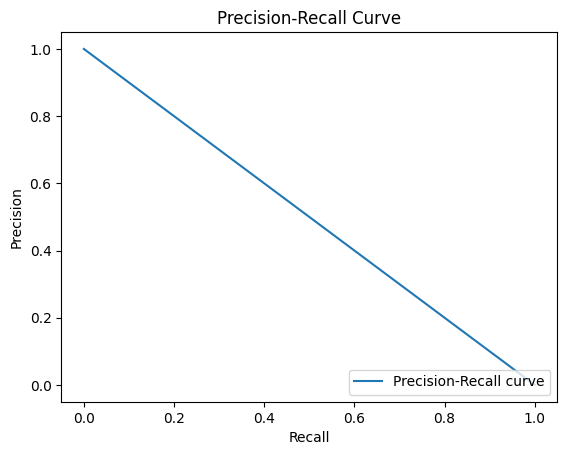

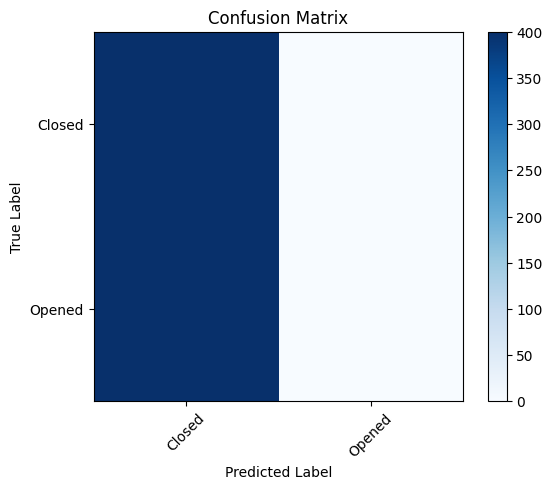

In [25]:
precision = dict()
recall = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(true_labels_binary[:, i], predicted_probs[:, i])
plt.figure()
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

predicted_labels = np.argmax(predicted_probs, axis=1)
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = validation_generator.class_indices.keys()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

(1, 150, 150, 3)
[[0.64705884 0.6745098  0.74509805]
 [0.6509804  0.6784314  0.7490196 ]
 [0.654902   0.6901961  0.7490196 ]
 [0.6627451  0.69803923 0.7647059 ]
 [0.6666667  0.7019608  0.76862746]
 [0.6666667  0.69803923 0.77254903]
 [0.67058825 0.7058824  0.77254903]
 [0.6745098  0.70980394 0.7764706 ]
 [0.68235296 0.7176471  0.78431374]
 [0.68235296 0.7176471  0.78431374]
 [0.6862745  0.72156864 0.7882353 ]
 [0.6862745  0.72156864 0.7882353 ]
 [0.6901961  0.7254902  0.7921569 ]
 [0.68235296 0.7294118  0.7921569 ]
 [0.6862745  0.73333335 0.79607844]
 [0.69411767 0.7294118  0.79607844]
 [0.6862745  0.7294118  0.8       ]
 [0.6901961  0.7372549  0.8       ]
 [0.6862745  0.7294118  0.8       ]
 [0.6862745  0.73333335 0.79607844]
 [0.6862745  0.73333335 0.79607844]
 [0.6784314  0.7254902  0.7882353 ]
 [0.68235296 0.7176471  0.78431374]
 [0.7529412  0.7764706  0.8235294 ]
 [0.81960785 0.8352941  0.87058824]
 [0.8039216  0.81960785 0.85490197]
 [0.81960785 0.84313726 0.8901961 ]
 [0.8627451

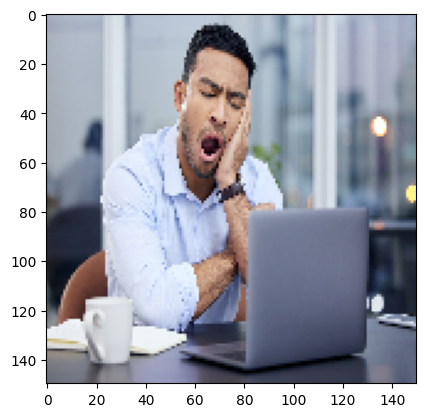

In [28]:
img_path = "/content/drive/My Drive/PreparedData/tired_worker.jpg"

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
print(img_tensor[0][0])
plt.imshow(img_tensor[0])
plt.show()

In [29]:
def convertjpg(jpgfile,outdir,width=150,height=150):
    img=Image.open(jpgfile)
    try:
        new_img=img.resize((width,height),Image.BILINEAR)
        new_img.save(os.path.join(outdir,os.path.basename(new_file)))
    except Exception as e:
        print(e)


(3840, 5760, 3)
1/1 [==============================] - 0s 24ms/step
[[0.08826245]]
(150, 150, 3)


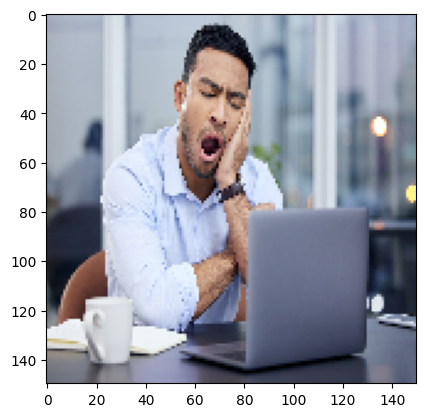

The probability of opened eye is： 0.9117375537753105


In [32]:
#jpgfile="/content/drive/My Drive/PreparedData/tired_worker.jpg"
#new_file="/content/drive/My Drive/PreparedData/tired_worker_new.jpg"

#convertjpg(jpgfile,r"/content/drive/My Drive/PreparedData")

from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

img_scale = plt.imread('/content/drive/My Drive/PreparedData/awake_worker.jpg')
print(img_scale.shape)
plt.imshow(img_scale)
img_path = "/content/drive/My Drive/PreparedData/tired_worker.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.0
result = model.predict(img_tensor)
print(result)
img_scale = img_tensor[0]
print(img_scale.shape)
plt.imshow(img_scale)
plt.show()
if result[0][0] > 0.5:
    print('The probability of opened eye is：', result[0][0])
else:
    print('The probability of closed eye is：', 1 - result[0][0])